### Import Libraries

In [1]:
"If it does not work use code below while running this notebook in this dir."
# import sys
# import os
# sys.path.append(os.path.abspath(os.getcwd()))

from mytorch import Tensor
from mytorch import activation as active_func
from mytorch import loss as loss_func
from mytorch import optimizer as optim 
from mytorch import layer as nn

import numpy as np
import matplotlib.pyplot as plt

### Simple Network
here you have to define a simple linear layer to find coefficients of x_i in below problem. <br>
y = ax_1 + bx_2 + cx_3 <br><br>
![simple network.drawio.png](<attachment:simple network.drawio.png>)
<br><br>
weights of this linear layer is your answer. 

### Generate Data

In [2]:
"TODO: set coefficients"
a = 1
b = 2
c = 3

X = Tensor(np.random.randn(100, 3))
coef = Tensor(np.array([[a], [b], [c]]))
y = X @ coef + 5


### Train Network

In [7]:
l = nn.Linear(3, 1, need_bias=True)

"TODO: define an optimizer"
optimizer = optim.SGD([l])

"TODO: print weight and bias of linear layer"
print("initial W and bias:")
print(l.weight)
print(l.bias)

batch_size = 20
epLoss = []

for epoch in range(100):
    
    epoch_loss = 0.0
    
    for start in range(0, 100, batch_size):
        end = start + batch_size

        inputs = X[start:end]

        # TODO: predicted
        predicted = l.forward(inputs)
        # TODO: calculate MSE loss
        actual = y[start:end]
        actual.data = actual.data.reshape(batch_size, 1)
        loss = loss_func.MeanSquaredError(predicted, actual)
        # TODO: backward
        loss.backward()
        # TODO: add loss to epoch_loss
        epoch_loss += loss.data

        # TODO: update w and b using optimizer
        optimizer.step()
        l.zero_grad()

    epLoss.append(epoch_loss)
    

initial W and bias:
Tensor([[ 0.8634548 ]
 [ 1.02439478]
 [-1.92928066]], requires_grad=True)
Tensor([0.], requires_grad=True)


### Evaluate

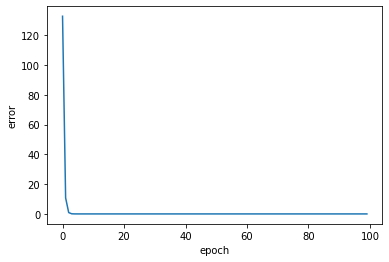


OUT W and bias:
Tensor([[1.]
 [2.]
 [3.]], requires_grad=True)
Tensor([5.], requires_grad=True)


In [8]:
plt.plot(epLoss, label='Error')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show();

print("\nOUT W and bias:")
print(l.weight)
print(l.bias)